In [1]:
using QuantumOptics
using PyPlot

/home/hhs/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


# Single ptl

In [2]:
N = 2
b = NLevelBasis(N)
t = 1
Htb = SparseOperator(b)
for i in 1:N-1
    Htb += -t*transition(b,i+1,i)
end
# PBC
Htb += -t*transition(b,1,N)
Htb += Htb'

Operator(dim=2x2)
  basis: NLevel(N=2)sparse([2, 1], [1, 2], ComplexF64[-2.0 + 0.0im, -2.0 + 0.0im], 2, 2)

# Two-body

In [3]:
b2 = b ⊗ b

[NLevel(N=2) ⊗ NLevel(N=2)]

In [4]:
#Ket(b2, [0,0,1,0,0,0,0,0,0])

In [5]:
#Ket(b,[0,0,1]) ⊗ Ket(b, [1,0,0]) 

In [12]:
U = 0.1
H_Hub = SparseOperator(b2, b2)
for i in 1:N
    H_Hub += U*transition(b,i,i)⊗transition(b,i,i)
end
H2 = embed(b2, 1, Htb) + embed(b2, 2, Htb) + H_Hub;
eigenenergies(dense(H2))

4-element Vector{Float64}:
 -3.9503124877939233
  0.0
  0.10000000000000009
  4.0503124877939225

# Many-Body

In [15]:
Nparticles = 2
b_mb = ManyBodyBasis(b, bosonstates(b, Nparticles))
H_mb = manybodyoperator(b_mb, Htb) + manybodyoperator(b_mb, H_Hub / 2)
#H_mb = manybodyoperator(b_mb, Htb) + H_Hub
Emb, Umb = eigenstates(dense(H_mb));
Emb

3-element Vector{Float64}:
 -3.950312487793915
  0.10000000000000542
  4.0503124877939225

# 2 particle

In [14]:
U = 0.1
H_Hub2 = SparseOperator(b_mb)
for i in 1:N
    H_Hub2 += U * number(b_mb,i) * ( number(b_mb,i) - identityoperator(b_mb) ) / 2
end
H_mb = manybodyoperator(b_mb, Htb) + H_Hub2;
Emb, Umb = eigenstates(dense(H_mb));
Emb

3-element Vector{Float64}:
 -3.950312487793915
  0.10000000000000542
  4.0503124877939225

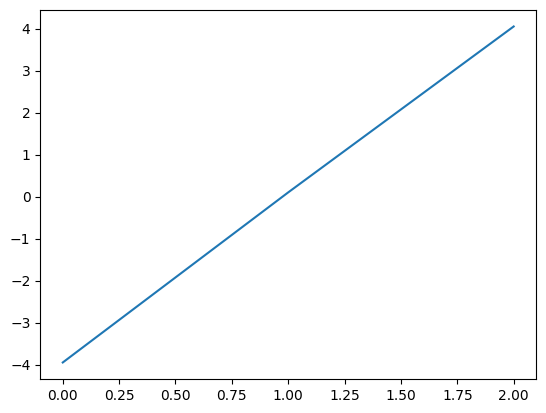

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f28f1508040>

In [9]:
plot(Emb)